pandas 已安装
matplotlib 已安装
seaborn 已安装
numpy 已安装
中文字体启用： SimHei


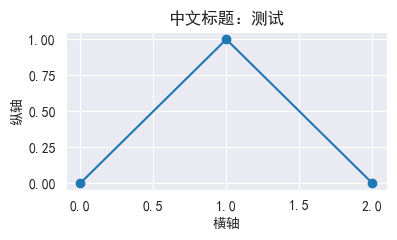

In [1]:
# ✓ 依赖安装 + Matplotlib 中文字体自动配置
import sys, subprocess

def ensure(pkg):
    try:
        __import__(pkg)
        print(f"{pkg} 已安装")
    except ImportError:
        print(f"正在安装 {pkg} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

for pkg in ("pandas", "matplotlib", "seaborn", "numpy"):
    ensure(pkg)

import os, urllib.request
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 1) 尝试使用常见中文字体
preferred = [
    "SimHei", "Microsoft YaHei", "PingFang SC", "Hiragino Sans GB",
    "Source Han Sans CN", "Source Han Sans SC", "Noto Sans CJK SC",
    "Noto Sans SC", "WenQuanYi Zen Hei", "Sarasa Gothic SC"
]
available = set(f.name for f in fm.fontManager.ttflist)
picked = None
for name in preferred:
    if name in available:
        picked = name
        break

# 2) 如无中文字体，自动下载 Noto Sans SC 并注册（需要外网）
if picked is None:
    print("未检测到本地中文字体，尝试下载 Noto Sans SC ...")
    url = "https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/SimplifiedChinese/NotoSansSC-Regular.otf"
    font_dir = Path.home() / ".local" / "share" / "fonts"
    font_dir.mkdir(parents=True, exist_ok=True)
    font_path = font_dir / "NotoSansSC-Regular.otf"
    if not font_path.exists():
        try:
            urllib.request.urlretrieve(url, font_path.as_posix())
            print("Noto Sans SC 下载完成")
        except Exception as e:
            print("字体下载失败：", e)
    # 运行时动态注册
    if font_path.exists():
        fm.fontManager.addfont(font_path.as_posix())
        matplotlib.rcParams['font.sans-serif'] = ["Noto Sans SC"]
        picked = "Noto Sans SC"

# 3) 配置 Matplotlib
if picked:
    matplotlib.rcParams['font.sans-serif'] = [picked]
matplotlib.rcParams['axes.unicode_minus'] = False
print("中文字体启用：", picked or "（未成功配置中文字体）")

# 小测试
import numpy as np
plt.figure(figsize=(4,2.5))
plt.title("中文标题：测试")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.plot([0,1,2],[0,1,0], "o-")
plt.tight_layout()
plt.show()


In [2]:
# --- Example 1: 库导入（修复拼写）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("已成功导入 pandas / numpy / matplotlib / seaborn")


已成功导入 pandas / numpy / matplotlib / seaborn


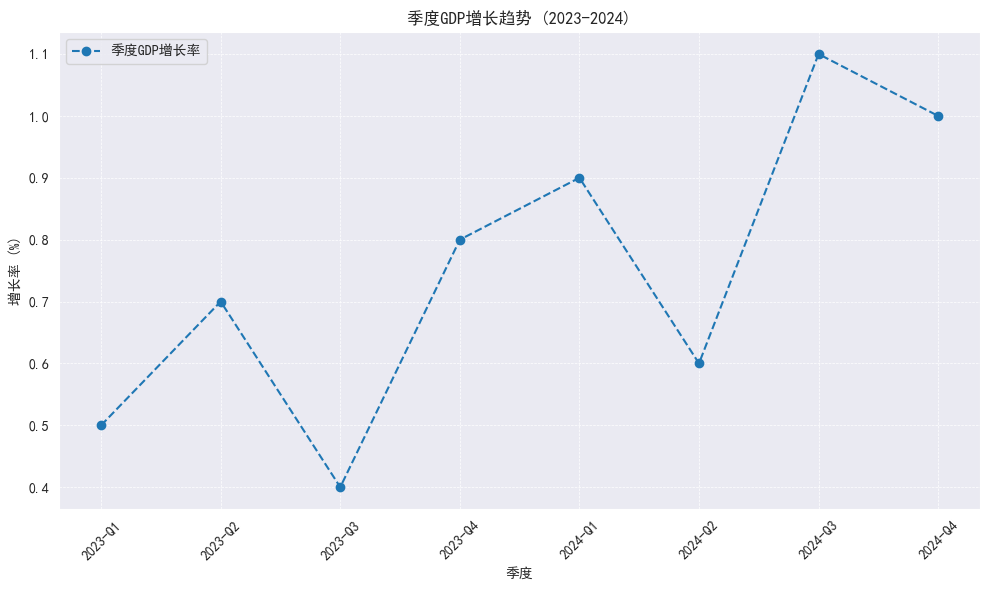

In [3]:
# --- Example 2: 季度 GDP 增长率折线图
quarters = ['2023-Q1', '2023-Q2', '2023-Q3', '2023-Q4', '2024-Q1', '2024-Q2', '2024-Q3', '2024-Q4']
gdp_growth = [0.5, 0.7, 0.4, 0.8, 0.9, 0.6, 1.1, 1.0]  # 单位：%

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(quarters, gdp_growth, marker='o', linestyle='--', label='季度GDP增长率')
ax.set_title('季度GDP增长趋势 (2023-2024)')
ax.set_xlabel('季度')
ax.set_ylabel('增长率 (%)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


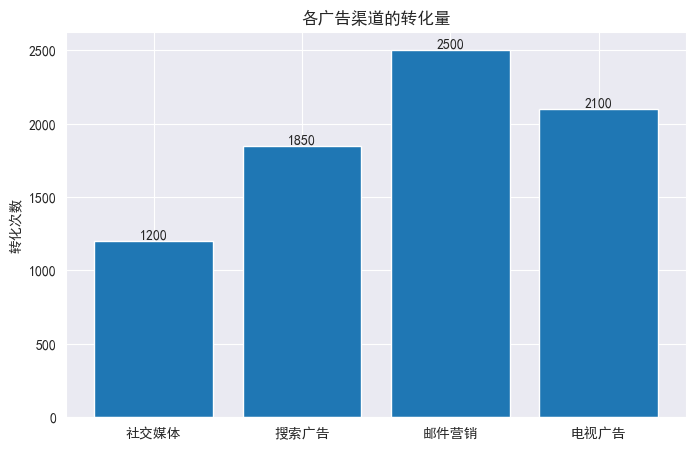

In [4]:
# --- Example 3: 各广告渠道的转化量柱状图
channels = ['社交媒体', '搜索广告', '邮件营销', '电视广告']
conversions = [1200, 1850, 2500, 2100]  # 与 channels 长度一致

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(channels, conversions)
ax.set_title('各广告渠道的转化量')
ax.set_ylabel('转化次数')
for i, v in enumerate(conversions):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()


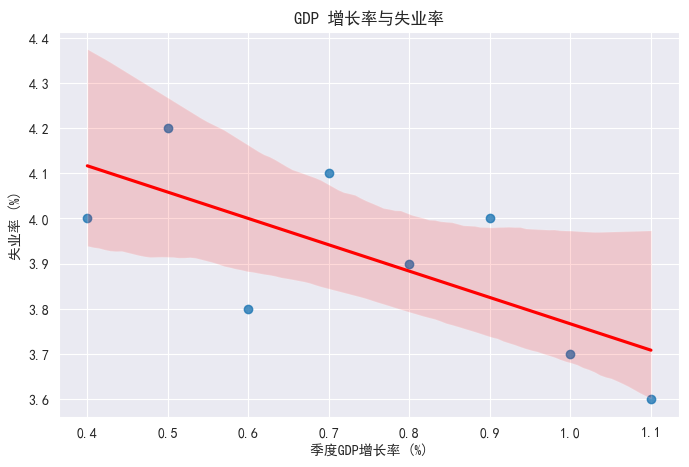

In [5]:
# --- Example 4: GDP 增长率 vs 失业率（回归图）
# 使用 Example 2 中的 gdp_growth；这里给出匹配长度的失业率数据
unemployment_rate = [4.2, 4.1, 4.0, 3.9, 4.0, 3.8, 3.6, 3.7]
df = pd.DataFrame({'Quarter': quarters, 'GDP_Growth': gdp_growth, 'Unemployment': unemployment_rate})

fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(data=df, x='GDP_Growth', y='Unemployment', ax=ax, line_kws={'color':'red'})
ax.set_title('GDP 增长率与失业率')
ax.set_xlabel('季度GDP增长率 (%)')
ax.set_ylabel('失业率 (%)')
plt.show()


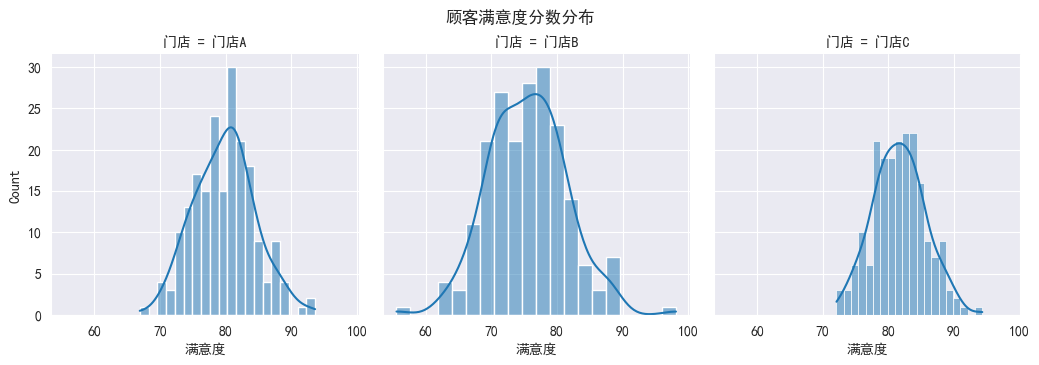

In [6]:
# --- Example 5: 顾客满意度分布（按门店分面）
np.random.seed(42)
stores = np.repeat(['门店A', '门店B', '门店C'], repeats=200)
satisfaction = np.concatenate([
    np.random.normal(80, 5, 200),
    np.random.normal(75, 6, 200),
    np.random.normal(82, 4, 200),
])
df_s = pd.DataFrame({'门店': stores, '满意度': satisfaction})

g = sns.FacetGrid(df_s, col="门店", sharex=True, sharey=True, height=3.5)
g.map_dataframe(sns.histplot, x="满意度", bins=20, kde=True)
g.fig.suptitle('顾客满意度分数分布', y=1.03)
plt.show()


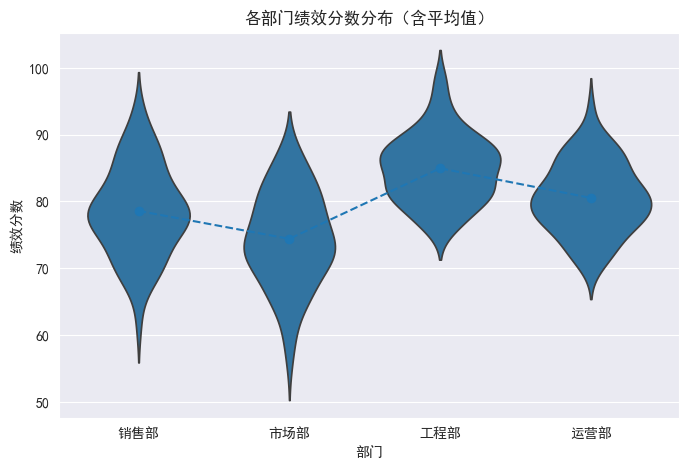

In [7]:
# --- Example 6: 部门绩效分数小提琴图（叠加平均值）
departments = ['销售部'] * 60 + ['市场部'] * 60 + ['工程部'] * 60 + ['运营部'] * 60
scores = np.concatenate([
    np.random.normal(78, 6, 60),
    np.random.normal(75, 7, 60),
    np.random.normal(85, 5, 60),
    np.random.normal(80, 6, 60),
])
df_d = pd.DataFrame({'部门': departments, '绩效分数': scores})

fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=df_d, x='部门', y='绩效分数', inner=None, ax=ax)
means = df_d.groupby('部门')['绩效分数'].mean().reindex(['销售部','市场部','工程部','运营部'])
ax.plot(range(len(means)), means.values, marker='o', linestyle='--')
ax.set_title('各部门绩效分数分布（含平均值）')
plt.show()
